In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
medical_df = pd.read_csv("../../data/medical-charges.csv")
print(medical_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**На основі наведеного попередньо плану дослідницького аналізу:**

1) Визначити цілі проєкту та ключові питання та підготувати гіпотези для перевірки.
Мета — зрозуміти, як змінні (вік, стать, ІМТ, кількість дітей, куріння, регіон) впливають на charges (Target), і знайти закономірності для побудови моделі прогнозу витрат.

2) Оцінити розмір датасету та структуру
Маємо 1338 записів і 7 змінних. Типи даних: числові (age, bmi, children, charges), категоріальні (sex, smoker, region).

3) Визначення унікальних категорій і їх розподілу
Для sex, smoker, region — порахувати унікальні значення, частки та виявити дисбаланс (наприклад, якщо курців мало). Візуалізуати з графіками

4) Аналіз розподілу
Перевірити age, bmi, children, charges — чи нормальні, чи є асиметрія.

5) Ідентифікація ознак з потенційним впливом
Наприклад, куріння (smoker) скоріш за все має сильний вплив на charges. age і bmi — потенційно також можуть мати вплив.

6) Виявити та обробити пропущені значення
У нашому датасеті пропущених значень немає (.info() показує 1338 non-null для всіх змінних).

7) Виправити або видалити аномалії
Перевірити на викиди в bmi, charges, children.

8) Видалити дублікати
Перевірити на повністю однакові рядки та видалити їх, якщо є.

9) Аналіз розподілу кожної змінної
Візуалізувати гістограми для числових, barplot для категоріальних. Подивитися, як виглядає charges.

10) Візуалізація взаємозв'язків

- Boxplot: charges vs smoker, sex, region

- Scatter: charges vs age, bmi

- Pairplot або heatmap для кореляцій.

11) Згрупувати charges за категоріями та порівняти середні значення
Наприклад, середні витрати по групах smoker, region, sex, щоб виявити сильні відмінності.

12) Далі певно побудова моделі

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

**Аналіз sex**

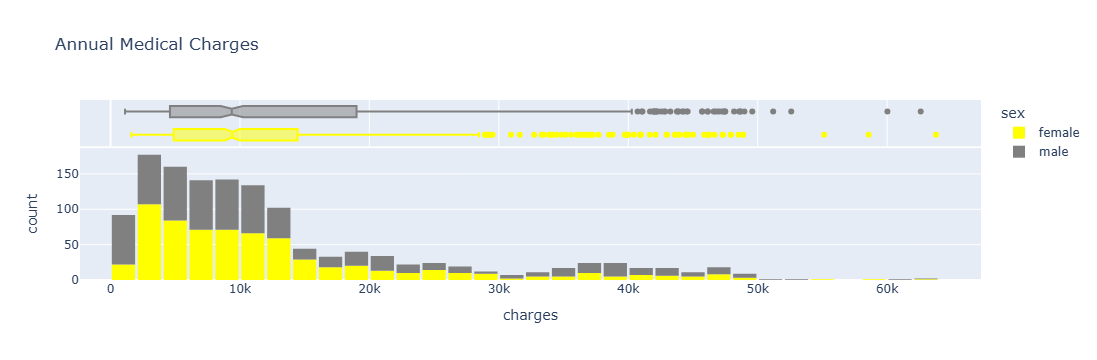

In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['yellow', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження sex**
- Більшість чоловіків та жінок знаходяться в межах виплат 14 тис
- Виплати до 2000 помітно більше чоловіків, далі тенденція приблизно 50/50
- В межах записів 35-40тис переважають чоловіки, але цих даних не так багато, та можливо це можемо назвати викидами
- Медіани десь приблизно поряд для чоловіків та жінок, але розкид більша у чоловіків, особливо правий «вус» — це вказує на більшу кількість випадків з високими витратами

- Не бачу суттевого впливу цієї колонки для базових медичних витрат — більшість користувачів у межах 0–15тис незалежно від статі
- У чоловіків спостерігається більша ймовірність екстремально високих витрат, що може бути пов’язано з ризиками здоров’я, віком або супутніми чинниками (наприклад, BMI, кількість дітей, куріння).

**Аналіз region**

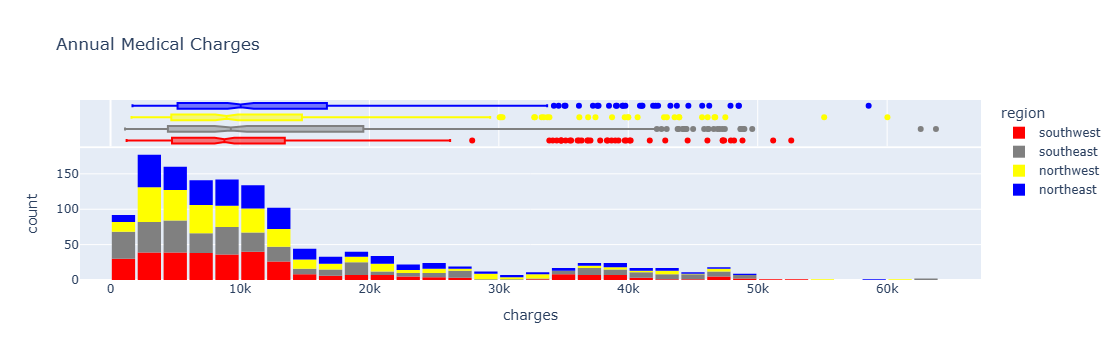

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'grey', 'yellow', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження region**
- Найбільша кількість записів по всіх регіонах зосереджена в межах 0-14тис
- Від 0-2000 переважають два регіони, хоча падальше розподілення приблизно рівне
- Також можемо побачити великі виплати (викиди) та вони є для кожного регіона
- Медіана близька для всіх регіонів
- Регіон Southeast має найширший міжквартильний розмах
- Southwest розподіл вужчий, але також має екстремальні значення
- Southeast може бути більш ризикованим, особливо порівняно з Southwest
- Вважаю регіон має помірний вплив на таргет

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

**Аналіз region vs smoker**

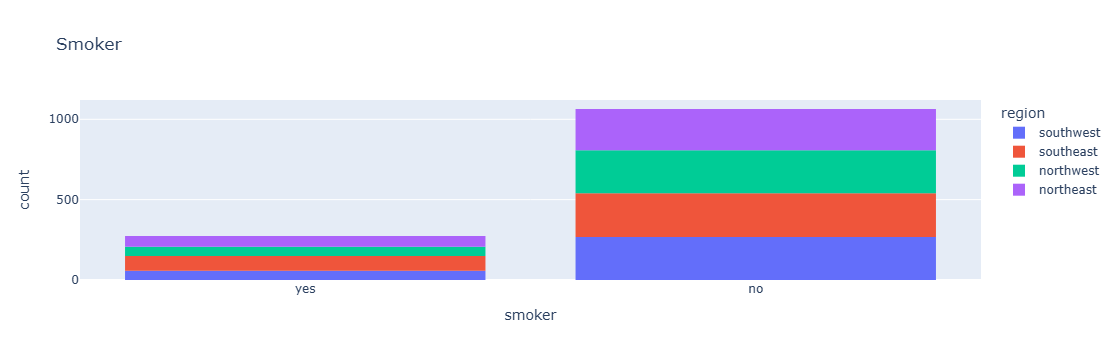

In [6]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

**Спостереження region vs smoker**
- Найменьше курців у Southwest, але найбільше також
- Можливо це пов'язано з загальною невеликою кількістю записів.
- Не бачу суттєвої залежності між регіоном проживання та курінням

**Аналіз region vs children**

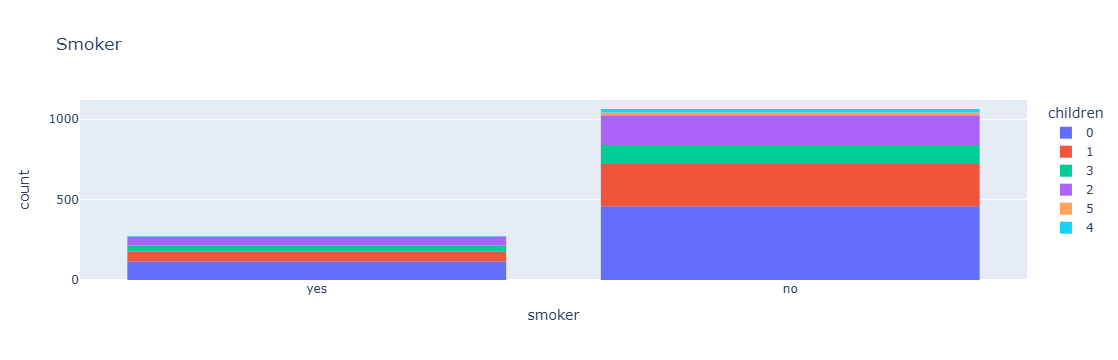

In [7]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

**Спостереження region vs children**
- Розподілення курців за кількістю дітей приблизно рівномірне. Найбільше записів людей без дітей
- Серед людей з 2-3 дітьми трохи більший відсоток некурців
- В цілому не думаю що кількість дітей може бути показова в цьому контексті

Краще помітно, якщо розрахувати проценти, графік наведено нижче

import pandas as pd
import plotly.express as px

# Підрахунок кількості smoker/children
counts = (
    medical_df
    .groupby(['smoker', 'children'])
    .size()
    .reset_index(name='count')
)

# Обчислення відсотків усередині кожної групи smoker
counts['percent'] = (
    counts
    .groupby('smoker')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# Побудова stacked bar з відсотками
fig = px.bar(
    counts,
    x='smoker',
    y='percent',
    color='children',
    title='Відсоток дітей серед курців та некурців',
    labels={'percent': 'Відсоток (%)'},
    barmode='stack',
    text_auto='.1f'
)

fig.show()

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

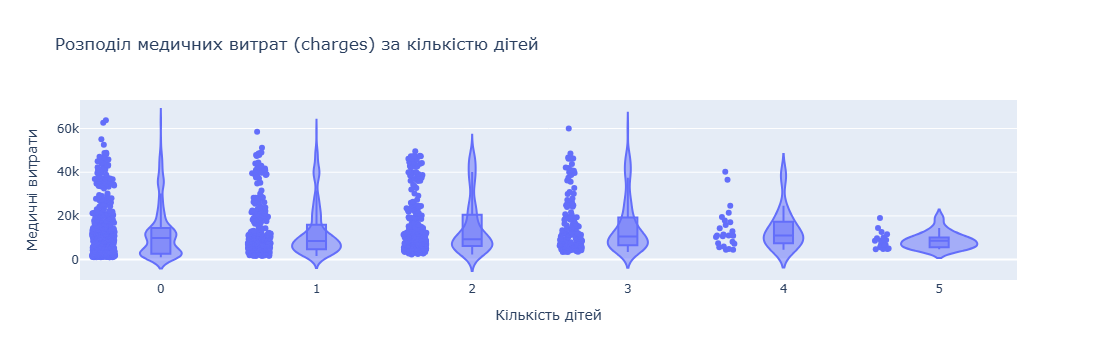

In [9]:
fig = px.violin(medical_df, 
                x="children", 
                y="charges", 
                box=True, 
                points="all", 
                title="Розподіл медичних витрат (charges) за кількістю дітей",
                labels={"children": "Кількість дітей", "charges": "Медичні витрати"})

fig.show()

**Спостереження**

- Можемо спостерігати що медіана приблизно однаковою залишається зі зміною кількості дітей
- Найбільша група в якої відсутні діти, як і помічали цю тенденцію раніше
- У більшості груп є поодинокі випадки дуже високих витрат (>40k, >60k), крім групи де 5 дітей, але вона дуже малочисельна
- Можна говорити що кількість дітей не має суттєвого впливу на типові витрати

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [11]:
def estimate_charges(age, w, b):
    return w * age + b

In [12]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [13]:
non_smoker_df.charges.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

- Спробуэмо розрахувати наскільки сильно витрати (charges) змінюються з віком (age), якщо вік від молодшого до старшого загалом змінюється на 47 років, та витрати в середньому від 2000 - 12000.

In [120]:
test_w_1 = (12000 - 2000) / 47
test_w_1
test_b_1 = 0

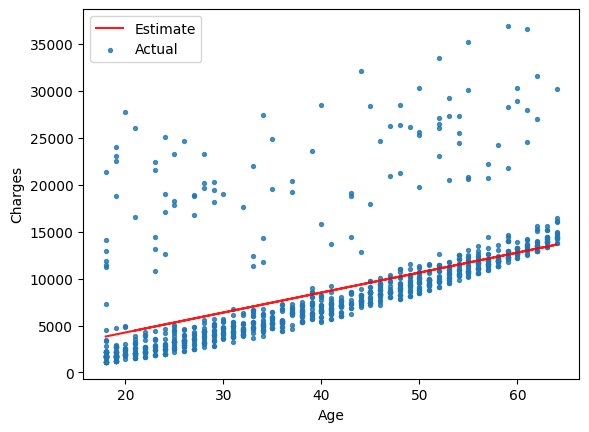

In [121]:
try_parameters(non_smoker_df, test_w_1, test_b_1)

- w=215: кожен рік додає ~215 доларів → реалістичне зростання.
- b=0: витрати на віці = 0 дорівнюють 0 — тобто немає базової стартової суми

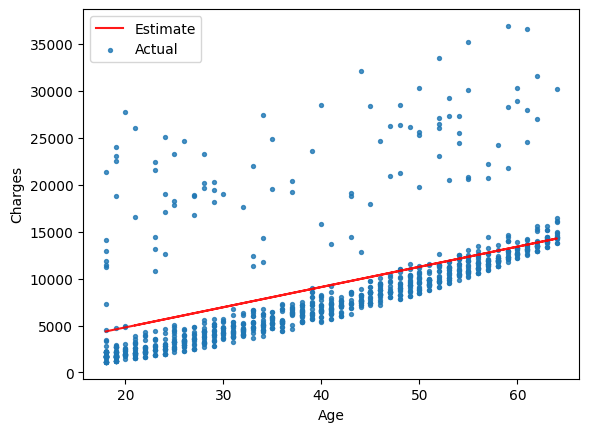

In [125]:
test_w_2 = 215
test_b_2 = 500
try_parameters(non_smoker_df, test_w_2, test_b_2)

Лінія регресії має правильний напрямок, змістилась нижче, десь переоцінює, десь недооцінює, можливо потрібно збільшити коефіцієнт нахилу w

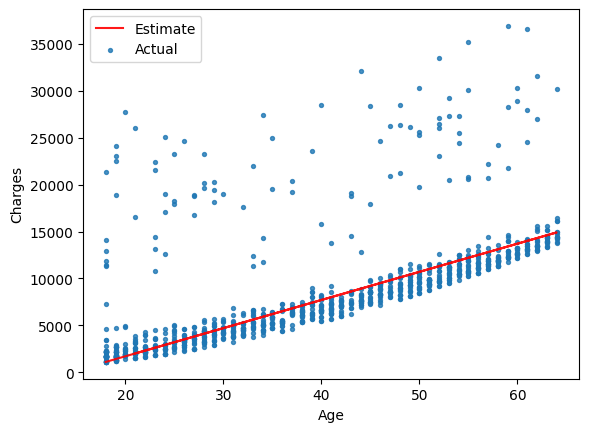

In [123]:
test_w_3 = 300
test_b_3 = -4300
try_parameters(non_smoker_df, test_w_3, test_b_3)

b = -4300:  трохи занижує оцінку, щоб не переоцінити витрати в молодому віці
- в цілому не впевнена що це доцільно

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [139]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def get_rmse_by_cases(test_w, test_b):
    y_true = non_smoker_df.charges
    y_pred = estimate_charges(non_smoker_df.age, test_w, test_b)

    print('case 1:', test_w, ' - ', test_b)
    print(rmse(y_true, y_pred))

In [140]:
get_rmse_by_cases(test_w_1, test_b_1)

case 1: 212.7659574468085  -  0
4725.476189480306


In [141]:
get_rmse_by_cases(test_w_2, test_b_2)

case 1: 215  -  500
4750.223454985063


In [142]:
get_rmse_by_cases(test_w_3, test_b_3)

case 1: 300  -  -4300
4774.458873587492


- Найкраще значення 4725.476189480306. Думаю що це далеко від ідеального
- можем створити функцію перебору, щоб знайти найкращу відповідність.
- Але якщо ми говоримо виключно про ручний підбір, то
    - Варто почати з нахилу, який візуально добре лягає по тренду
    - Підтягувати лінію по вертикалі (b) ближче до центру точок